# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ivan Tandella
- **Email:** ivantandella2@gmail.com
- **ID Dicoding:** ivantandella

## Menentukan Pertanyaan Bisnis

- Berapa jumlah penyewaan sepeda pada tahun 2011 selama musim salju?
- Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda saat musim salju?
- Bagaimana cara meningkatkan penyewaan sepeda pada pengguna biasa di musim salju?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [1]:
# download dataset
!gdown 1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ

Downloading...
From: https://drive.google.com/uc?id=1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ
To: /content/Bike-sharing-dataset.zip
100% 280k/280k [00:00<00:00, 51.3MB/s]


In [3]:
# extract file
!unzip ./Bike-sharing-dataset.zip

Archive:  ./Bike-sharing-dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


In [14]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [15]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

### Cek tipe data

In [16]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [17]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


> `dteday` memiliki tipe data `object`, seharusnya `datetime`

### Cek missing value

In [18]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [19]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

> Tidak ditemukan missing value pada dataset

### Cek duplikasi data

In [20]:
print("Jumlah duplikasi dataframe day: ", day_df.duplicated().sum())
print("Jumlah duplikasi dataframe hour: ", hour_df.duplicated().sum())

Jumlah duplikasi dataframe day:  0
Jumlah duplikasi dataframe hour:  0




> Tidak ditemukan data yang duplikat pada dataset





### Cleaning Data

Memperbaiki tipe data yang tidak sesuai

In [23]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
print('day_df["dteday"] : ', day_df["dteday"].dtypes)

day_df["dteday"] :  datetime64[ns]


In [24]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
print('hour_df["dteday"] : ', hour_df["dteday"].dtypes)

hour_df["dteday"] :  datetime64[ns]


## Exploratory Data Analysis (EDA)

### Explore data day

In [21]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Explore data hour

In [22]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Visualization & Explanatory Analysis

### Berapa jumlah penyewaan sepeda pada tahun 2011 selama musim salju?

In [29]:
# Filter data untuk tahun 2011 dan musim salju
winter_2011_df = day_df[(day_df["yr"] == 0) & (day_df["season"] == 4)]

# Hitung total penyewaan sepeda pada tahun 2011 selama musim salju
total_rentals = winter_2011_df["cnt"].sum()

# Tampilkan hasil
print("Total penyewaan sepeda pada tahun 2011 selama musim salju:", total_rentals)

Total penyewaan sepeda pada tahun 2011 selama musim salju: 326137


### Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda saat musim salju?

In [46]:
# Filter data untuk musim salju
winter_day_df = day_df[day_df["season"] == 4]

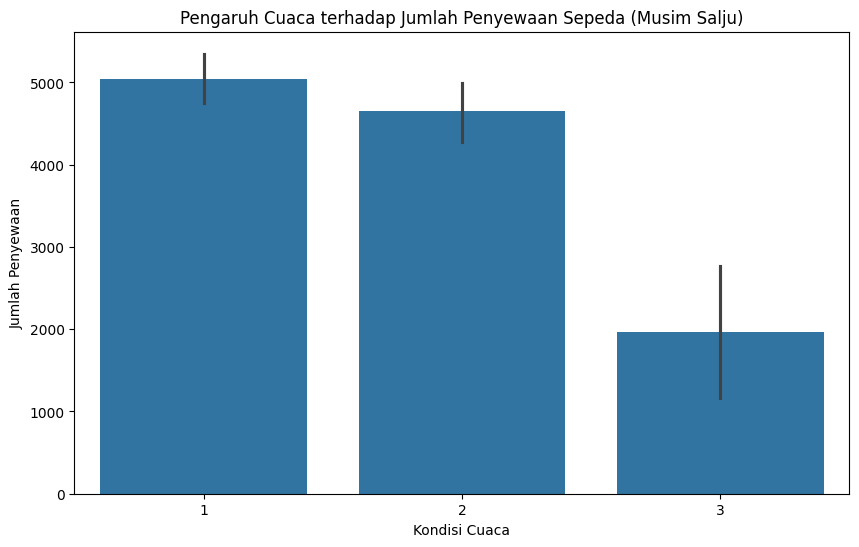

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(x="weathersit", y="cnt", data=winter_day_df)
plt.title("Pengaruh Cuaca terhadap Jumlah Penyewaan Sepeda (Musim Salju)")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Penyewaan")
plt.show()

Kondisi cuaca:

 1: Clear, Few clouds, Partly cloudy, Partly cloudy

 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

> Dari grafik di atas, dapat dilihat bahwa kondisi cuaca dapat memengaruhi jumlah penyewaan sepeda pada saat musim salju. Kondisi cuaca yang cerah cenderung lebih banyak jumlah penyewaan sepeda, sedangkan kondisi hujan atau salju ringan terlihat jumlah penyewaan sepeda lebih sedikit.

### Bagaimana cara meningkatkan penyewaan sepeda pada pengguna biasa di musim salju?

In [39]:
# Filter data untuk pengguna biasa (casual) di musim salju
winter_casual_df = hour_df[(hour_df["season"] == 4) & (hour_df["casual"] != 0)]

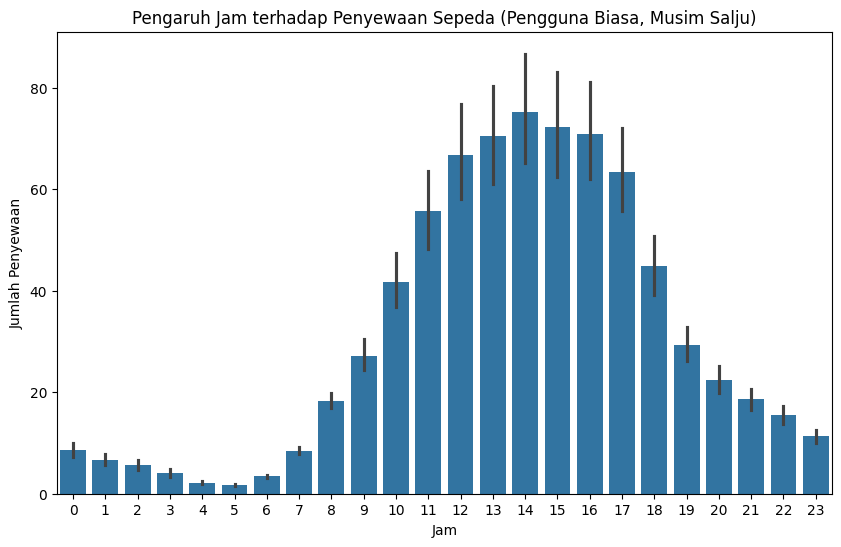

In [41]:
# Pengaruh jam terhadap penyewaan sepeda
plt.figure(figsize=(10, 6))
sns.barplot(x="hr", y="casual", data=winter_casual_df)
plt.title("Pengaruh Jam terhadap Penyewaan Sepeda (Pengguna Biasa, Musim Salju)")
plt.xlabel("Jam")
plt.ylabel("Jumlah Penyewaan")
plt.show()

> Dari grafik di atas dapat dilihat pengaruh jam terhadap jumlah penyewaan sepeda. Penyewaan sepeda menunjukkan peningkatan mulai pada pagi hari jam 6, dengan puncak tertinggi berada pada jam 14 siang. Penyewaan sepeda mengalami penurunan mulai jam 15 sore hingga malam dini hari. Hal tersebut menunjukkan waktu aktif beraktivitas pada pengguna kasual.

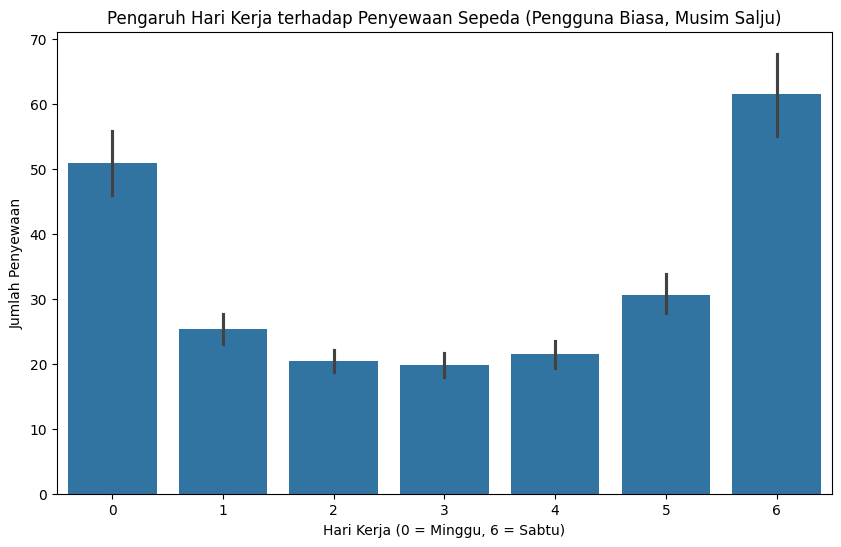

In [43]:
# Pengaruh hari kerja terhadap penyewaan sepeda
plt.figure(figsize=(10, 6))
sns.barplot(x="weekday", y="casual", data=winter_casual_df)
plt.title("Pengaruh Hari Kerja terhadap Penyewaan Sepeda (Pengguna Biasa, Musim Salju)")
plt.xlabel("Hari Kerja (0 = Minggu, 6 = Sabtu)")
plt.ylabel("Jumlah Penyewaan")
plt.show()

> Dari grafik di atas terlihat pengaruh hari terhadap jumlah penyewaan sepeda. Grafik tersebut menunjukkan bahwa peminjaman sepeda cenderung lebih sedikit pada hari senin sampai jumat, dan lebih banyak pada hari sabtu dan minggu. Hal tersebut dapat dikarenakan pada hari sabtu dan minggu adalah hari dimana orang dapat lebih bersantai dari pekerjaan sehari-hari.

Untuk meningkatkan penyewaan sepeda pada pengguna biasa, dapat melakukan beberapa hal, seperti:


*   Melakukan promosi yang menargetkan pekerja atau pelajar pada hari senin sampai jumat.
*   Memberikan diskon khusus pada jam-jam tertentu, atau cuaca tertentu.
* Menawarkan paket wisata sepeda yang aman untuk musim salju seperti jalur indah dan aman dari es salju.
* Memberikan paket peralatan bersepeda selama musim salju, seperti jaket, sarung tangan, sepatu.
* Menjalin kerja sama dengan toko,restoran, atau fasilitas umum lainnya untuk menyediakan stasiun sepeda sehingga dapat memudahkan mobilitas pengguna



## Conclusion

- Total penyewaan sepeda pada tahun 2011 selama musim salju adalah 326137
- Kondisi cuaca memiliki pengaruh yang signifikan terhadap jumlah penyewaan sepeda saat musim salju. Cuaca cerah cenderung meningkatkan jumlah penyewaan, sementara hujan atau salju ringan menguranginya. Cuaca buruk seperti badai salju atau hujan es dapat menghentikan penyewaan sepenuhnya.
- Beberapa strategi dapat diterapkan untuk meningkatkan penyewaan sepeda di kalangan pengguna biasa selama musim salju, seperti promosi kepada pekerja atau pelajar di hari kerja, diskon khusus berdasarkan waktu atau cuaca, paket wisata salju, penyewaan peralatan pelengkap, dan bermitra dengan bisnis lokal.

Dengan menerapkan strategi-strategi ini, dimungkinkan untuk meningkatkan jumlah penyewaan sepeda di kalangan pengguna biasa bahkan selama bulan-bulan musim dingin.